# Make more money by buying lottery? 
## --- (Python Crawler+Data Analysis)

## Introduction

**In this report, I will extract 100 pages of '3d' lottery data from http://www.zhcw.com to see if there is any strategy to make more money by buying the lottery. '3d' lottery is one of the favorite lottery game in China. People can choose 3 numbers from 000 to 999 and wait for one winning numbers. Firstly, let's see the data structure: we have Date(One time per day), period, winning numbers, sale amount and reward ratio.**

![jupyter](./data.jpeg)

## Get the Data

**By analyzing the web source code, and using the 'Requests' package, 'Xpath' method to get the lottery data from 2013 to current date.**

In [2]:
import requests
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'} #Simulate the browser, keep-alive to make the process 
url = 'http://kaijiang.zhcw.com/zhcw/html/3d/list_1.html'
response = requests.get(url = url,headers = headers)
print(response)

<Response [200]>


**Code '200' means that the we can successfully extract the data.**

In [3]:
response_default = requests.get(url = url)
print(response_default.request.headers)

{'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


**The code is not always equal 200 because some website did not allow the python to extract the information. Thus, we need change our heaeders sometimes to make the website always know that it is not the robot(python) to extract the data.**

In [4]:
response.request.headers

{'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [5]:
from lxml import etree

In [6]:
res_xpath = etree.HTML(response.text) #turn html to xpath structure

In [7]:
print(res_xpath.xpath('/html/body/table//tr[3]/td[2]/text()'))

['2019120']


In [8]:
trs = res_xpath.xpath('/html/body/table//tr')

**trs will have 20 elements to be stored because there are 20 items shown in one page.**

In [9]:
print(trs)

[<Element tr at 0x10df98708>, <Element tr at 0x10df98a88>, <Element tr at 0x10df98b08>, <Element tr at 0x10df98b48>, <Element tr at 0x10df98ac8>, <Element tr at 0x10df98bc8>, <Element tr at 0x10df98c08>, <Element tr at 0x10df98c48>, <Element tr at 0x10df98c88>, <Element tr at 0x10df98b88>, <Element tr at 0x10df98cc8>, <Element tr at 0x10df98d08>, <Element tr at 0x10df98d48>, <Element tr at 0x10df98d88>, <Element tr at 0x10df98dc8>, <Element tr at 0x10df98e08>, <Element tr at 0x10df98e48>, <Element tr at 0x10df98e88>, <Element tr at 0x10df98ec8>, <Element tr at 0x10df98f08>, <Element tr at 0x10df98f48>, <Element tr at 0x10df98f88>, <Element tr at 0x10df98fc8>]


## Write the data into Excel

In [1]:
import xlwt

In [22]:
#create one working sheet
f = xlwt.Workbook()

In [23]:
lotto = f.add_sheet('lottery',cell_overwrite_ok=True)

In [24]:
#header in excel
row = ['Date','Period','number1','number2','number3','sale_amount','reward ratio']
for i in range(0,len(row)):
    lotto.write(0,i,row[i])

In [ ]:
#We need to scrap more data so we need different url and same process above.(I plan to get 100 pages of lottery info)
#we have already opened a xls file and have it headers.

In [25]:
j = 1
for i in range(1,101):
    url = 'http://kaijiang.zhcw.com/zhcw/html/3d/list_{}.html'.format(i)
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}
    response = requests.get(url = url,headers = headers)
    res_xpath = etree.HTML(response.text)
    trs = res_xpath.xpath('/html/body/table//tr')
    
    for tr in trs[2:-1]:
        lotto.write(j,0,tr.xpath('./td[1]/text()'))
        lotto.write(j,1,tr.xpath('./td[2]/text()'))
        lotto.write(j,2,tr.xpath('./td[3]/em[1]/text()'))
        lotto.write(j,3,tr.xpath('./td[3]/em[2]/text()'))
        lotto.write(j,4,tr.xpath('./td[3]/em[3]/text()'))
        lotto.write(j,5,tr.xpath('./td[7]/strong[1]/text()'))
        lotto.write(j,6,tr.xpath('./td[8]/text()'))
        j += 1


In [26]:
f.save('lotto.xls')

**Now,we have our xls file to store 2000 lottery data (2000 days)**

## Analyze the data

In [27]:
import pandas as pd

In [185]:
data = pd.read_csv('lotto.csv')

In [30]:
data.head()

,Date,Period,number1,number2,number3,sale_amount,reward ratio
0,2019-05-27,2019140,2,7,6,"48,426,226",89.26%
1,2019-05-26,2019139,8,4,9,"47,600,472",29.39%
2,2019-05-25,2019138,3,3,1,"48,452,642",63.42%
3,2019-05-24,2019137,3,4,7,"50,622,682",76.94%
4,2019-05-23,2019136,6,7,0,"48,602,548",67.78%


In [31]:
data.info() #there is no missing value to be imputed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
Date            2000 non-null object
Period          2000 non-null int64
number1         2000 non-null int64
number2         2000 non-null int64
number3         2000 non-null int64
sale_amount     2000 non-null object
reward ratio    2000 non-null object
dtypes: int64(4), object(3)
memory usage: 109.5+ KB


In [32]:
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**from the data, the there is no significant correlation between winning numbers and orders.**

Text(0.5, 1.0, 'number3')

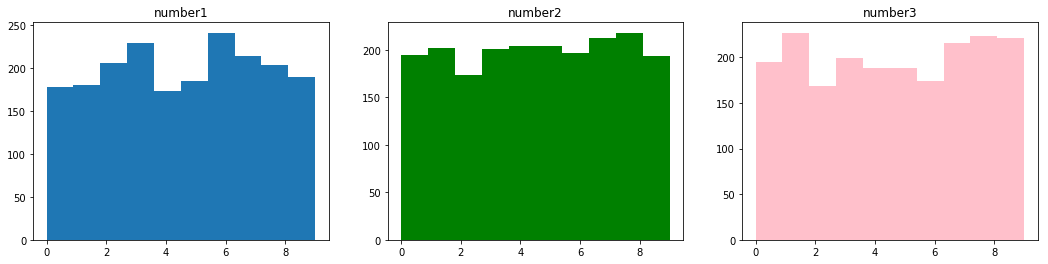

In [64]:
figsize = 18,4
fig = plt.figure(figsize=figsize)
ax1 = fig.add_subplot(1,3,1)
ax1.hist(data['number1'])
ax1.set_title('number1')
ax2 = fig.add_subplot(1,3,2)
ax2.hist(data['number2'],color='green')
ax2.set_title('number2')
ax3 = fig.add_subplot(1,3,3)
ax3.hist(data['number3'],color='pink')
ax3.set_title('number3')

**Next I will examine whether the company will prefer any specific number**

In [88]:
li1 = []
for i in range(2,5):
    for j in data.iloc[:,i]:
        li1.append(j)

In [104]:
#plt.hist(li1,orientation='horizontal')
for i in range(10):
    print('number',i,':',li1.count(i))

number 0 : 568
number 1 : 609
number 2 : 549
number 3 : 629
number 4 : 565
number 5 : 577
number 6 : 612
number 7 : 642
number 8 : 645
number 9 : 604


**it seems number 3 7 8 is more likely to be chosen, next I will find the relationship between numbers and date.**

In [140]:
li2 = []
for i in range(0,2000):
    li2.append(pd.to_datetime(data.iloc[i,0]).weekday()+1)

In [186]:
data['DayoftheWeek'] = li2

In [187]:
data.head() #1:Monday,2:Thuesday..7:Sunday

,Date,Period,number1,number2,number3,sale_amount,reward ratio,DayoftheWeek
0,2019-05-27,2019140,2,7,6,"48,426,226",89.26%,1
1,2019-05-26,2019139,8,4,9,"47,600,472",29.39%,7
2,2019-05-25,2019138,3,3,1,"48,452,642",63.42%,6
3,2019-05-24,2019137,3,4,7,"50,622,682",76.94%,5
4,2019-05-23,2019136,6,7,0,"48,602,548",67.78%,4


In [212]:
data[data['DayoftheWeek']==1].head()

,Date,Period,number1,number2,number3,sale_amount,reward ratio,DayoftheWeek
0,2019-05-27,2019140,2,7,6,"48,426,226",89.26%,1
7,2019-05-20,2019133,2,1,9,"48,158,756",67.87%,1
14,2019-05-13,2019126,4,7,0,"48,571,358",39.26%,1
21,2019-05-06,2019119,2,4,9,"50,407,680",31.10%,1
28,2019-04-29,2019112,9,2,2,"49,786,448",42.41%,1


In [236]:
#set the function to count each number in every day of the week
def countday(data):
    li1 = []
    for i in range(2,5):
        for j in data.iloc[:,i]:
            li1.append(j)
    for i in range(10):
        print('number',i,':',li1.count(i),' probability:',round(li1.count(i)/len(li1),3))      

In [244]:
countday(data[data['DayoftheWeek']==1])

number 0 : 81  probability: 0.094
number 1 : 85  probability: 0.099
number 2 : 73  probability: 0.085
number 3 : 84  probability: 0.098
number 4 : 58  probability: 0.068
number 5 : 76  probability: 0.089
number 6 : 78  probability: 0.091
number 7 : 118  probability: 0.138
number 8 : 99  probability: 0.115
number 9 : 106  probability: 0.124


## Conclusion

**After checking every date, I make a table for chossing the best 3 numbers for each day of the week, which is the most likely numbers in that day based on these 5 years dataset. However, this strategy may not the best one to use, and we need combine more data to consider. We cannot use lottery to earn money even we have better strategy because, actually, each number will have eventually same probability (1/10) to be picked, and we should just have fun playing it.**

In [4]:
from prettytable import PrettyTable
x= PrettyTable(["Day of Week", "number1", 'number2','number3'])
x.add_row(['Monday',7,8,9])
x.add_row(["Thuesday",4,6,8])
x.add_row(["Wednesday",3,5,8])
x.add_row(["Thursday",1,3,8])
x.add_row(["Friday",3,6,8])
x.add_row(["Saturday",1,7,0])
x.add_row(["Sunday",1,0,7])
print(x)

+-------------+---------+---------+---------+
| Day of Week | number1 | number2 | number3 |
+-------------+---------+---------+---------+
|    Monday   |    7    |    8    |    9    |
|   Thuesday  |    4    |    6    |    8    |
|  Wednesday  |    3    |    5    |    8    |
|   Thursday  |    1    |    3    |    8    |
|    Friday   |    3    |    6    |    8    |
|   Saturday  |    1    |    7    |    0    |
|    Sunday   |    1    |    0    |    7    |
+-------------+---------+---------+---------+
